In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
%matplotlib inline
from sklearn import linear_model
import seaborn as sbn

In [2]:
hs=pd.read_csv("datasets/housing.csv")

In [3]:
hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
hs.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


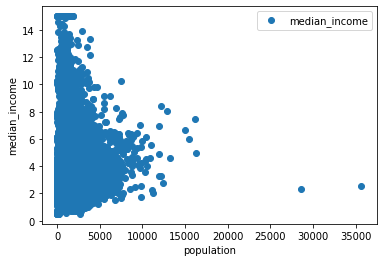

In [5]:
hs.plot(x='population', y='median_income', style='o')
plot.xlabel('population')
plot.ylabel('median_income')
plot.show()

In [6]:
X = np.array(hs["population"]).reshape((-1, 1))
y = hs["median_income"]

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [9]:
print(regressor.intercept_)

3.8655190832934645


In [10]:
print(regressor.coef_)

[7.56206812e-06]


In [11]:
y_pred = regressor.predict(X_test)

In [12]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
14740,4.1518,3.877248
10101,5.7796,3.875320
20566,4.3487,3.877271
2670,2.4511,3.868468
15709,5.0049,3.870427
...,...,...
6655,2.4817,3.881021
3505,4.3839,3.871629
1919,3.2027,3.871947
1450,6.1436,3.873626


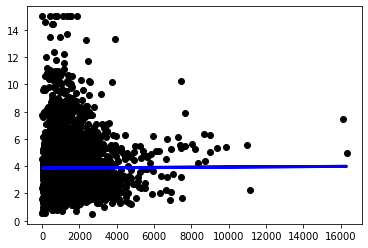

In [13]:
plot.scatter(X_test, y_test,  color='black')
plot.plot(X_test, y_pred, color='blue', linewidth=3)


In [14]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.3890480724939165
Mean Squared Error: 3.5033645560910163
Root Mean Squared Error: 1.8717276928258064


In [15]:
predict = regressor.predict([[4148]])
print(predict)

[3.89688654]
